## Import Libraries 

In [1]:
# Import Lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from xgboost import XGBClassifier
import xgboost
from sklearn.linear_model import LogisticRegression
import math
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn.neural_network import MLPClassifier

%matplotlib inline

# Importing the dataset
dataset_train = pd.read_csv('train.csv', header=None)
dataset_test = pd.read_csv('test.csv', header=None)
header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital-status','Occupation','\
Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
dataset_train = pd.DataFrame(dataset_train.values, columns = header) 
dataset_test = pd.DataFrame(dataset_test.values, columns = header[:-1]) 

# Take all columns except last one
train = dataset_train.iloc[:, :-1]
test = dataset_test.iloc[:, :]
y = dataset_train.iloc[:, dataset_train.shape[1]-1]
y = y.astype(int)
print(dataset_train.shape)

(31654, 15)


/home/tony/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Analysis

In [42]:
dataset_train

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,37,Private,272950,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
1,31,Private,261943,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
2,29,Private,285419,12th,8,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,0
3,40,Private,182217,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Scotland,0
4,52,State-gov,71344,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
5,49,Self-emp-inc,201080,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,United-States,0
6,21,Private,122048,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,29,United-States,0
7,61,Self-emp-not-inc,221884,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,1
8,25,Self-emp-not-inc,108001,9th,5,Never-married,Craft-repair,Not-in-family,White,Male,0,0,15,United-States,0
9,47,Private,171751,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,0


(31654, 15)


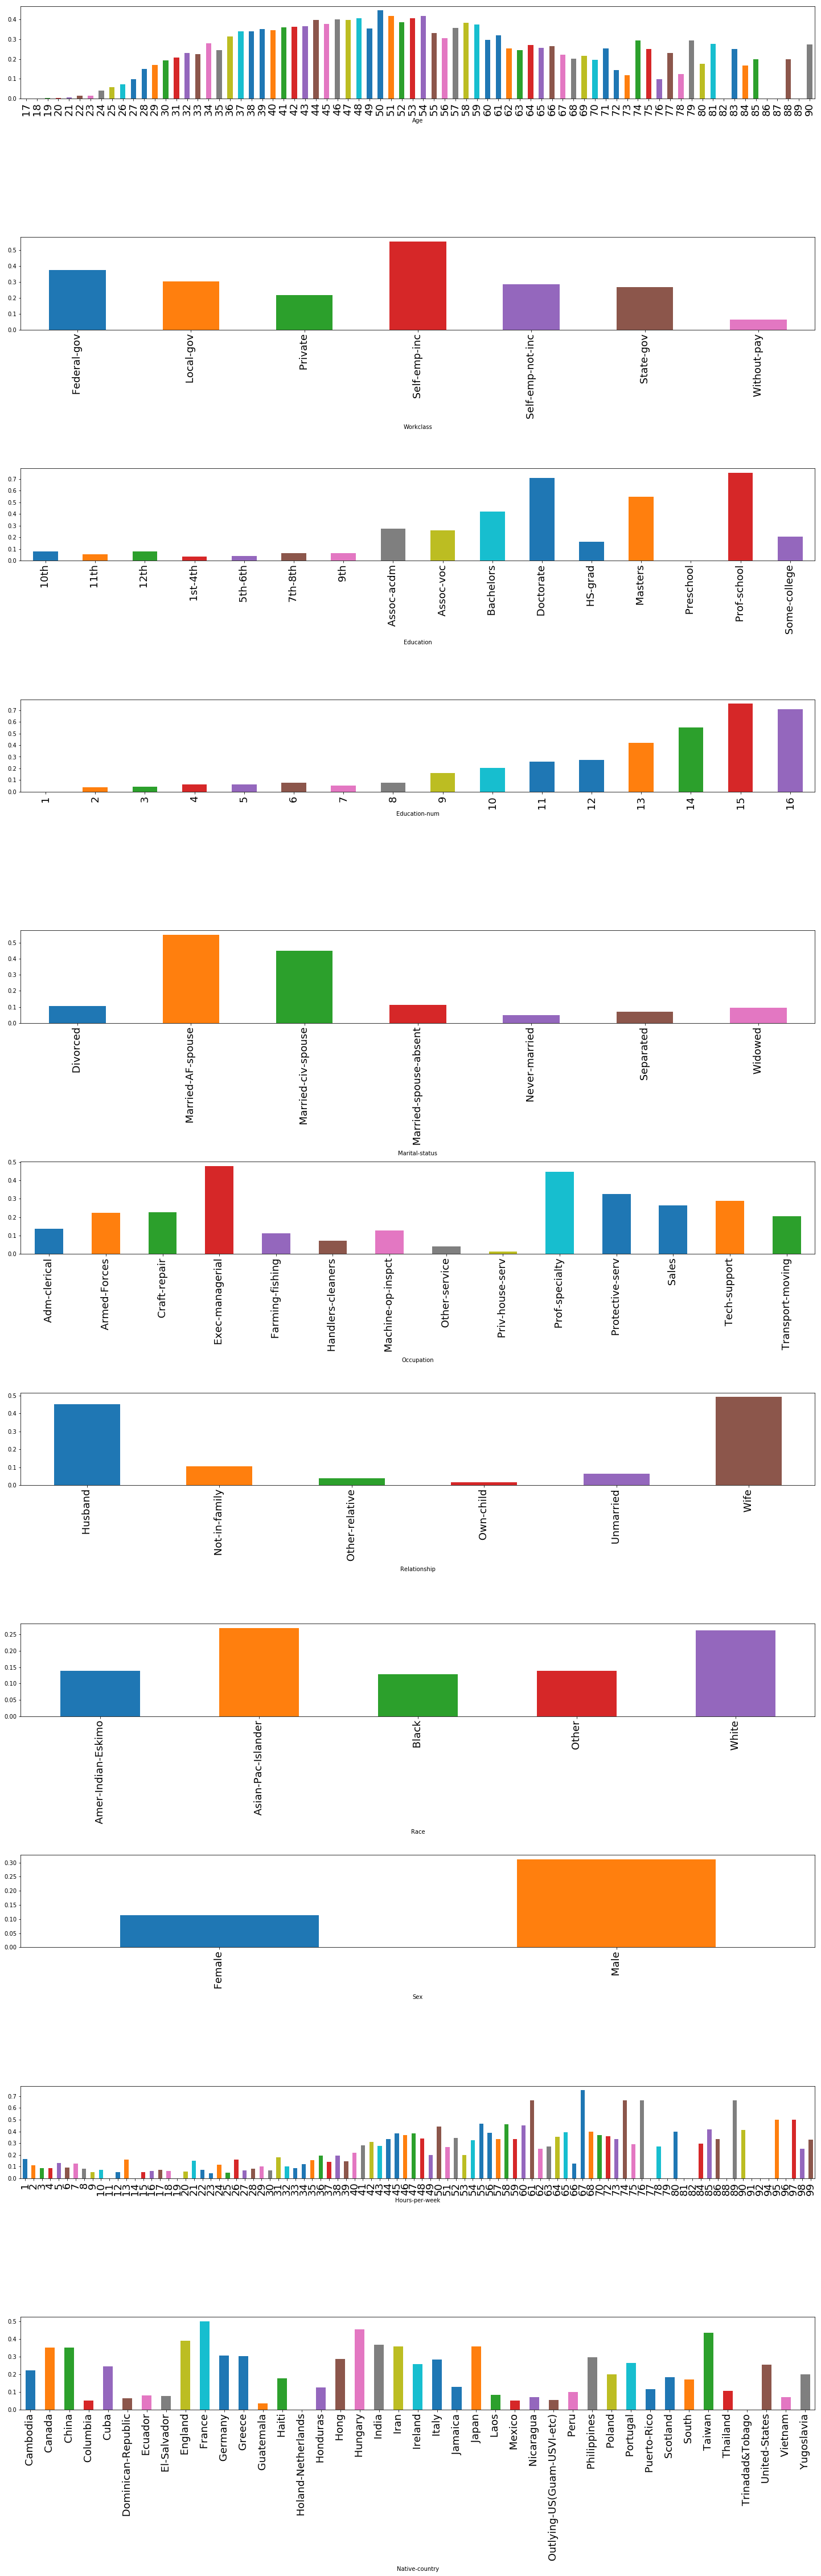

In [43]:
matplotlib.rcParams.update({'xtick.labelsize': 18})
#print(list(dataset_train)[0])
fig = plt.figure(figsize=(25,100))
fig.subplots_adjust(hspace = 1.5)
now = 1
for i in range(14):
    if i!=2 and i!=10 and i!=11:
        plt.subplot(14, 1, now)
        now += 1
        key = list(dataset_train)[i]
        
        group = dataset_train.groupby(key)['Income'].sum() / dataset_train.groupby(key)['Income'].size()
        group.plot(kind='bar')
        
print(dataset_train.shape)

## Data preprocessing

In [47]:
# Encoding categorial data
# Replace string by categories number
drop = []
train_objs_num = len(train)

dataset = train.append(test)
print(train.shape)
print(test.shape)
print(dataset.shape)

# Salary Mapping

###############################################
# Mapping Method 1
##############################################

edu_mapping = {
        ' Preschool':0, 
        ' 1st-4th':1,
        ' 5th-6th':2,
        ' 7th-8th':3,
        ' 9th':4,
        ' 10th':5,
        ' 11th':6,
        ' 12th':7,
        ' HS-grad':8,
        ' Some-college':9,
        ' Assoc-voc':10,
        ' Assoc-acdm':11,
        ' Bachelors':12,
        ' Masters':13,
        ' Prof-school':14,
        ' Doctorate':15
}
gender_mapping = {
    ' Female':0,
    ' Male':1
}
race_mapping = {
    ' Amer-Indian-Eskimo':1,
    ' White':4, 
    ' Asian-Pac-Islander':3, 
    ' Other':0, 
    ' Black':2
}
marital_mapping={
    ' Married-civ-spouse':1,
    ' Divorced':0,
    ' Never-married':1,
    ' Separated':0,
    ' Widowed':0,
    ' Married-spouse-absent':1,
    ' Married-AF-spouse':1
}
relation_mapping={
    ' Wife':2,
    ' Husband':2,
    ' Own-child':1,
    ' Otherrelative':1,
    ' Not-in-family':0,
    ' Unmarried':0
}
#['Age','Workclass','fnlwgt','Education','Education-num','Marital-status','Occupation',' \
#                     Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']

dataset['Education'] = dataset['Education'].map(edu_mapping)
dataset['Sex'] = dataset['Sex'].map(gender_mapping)
dataset['Race'] = dataset['Race'].map(race_mapping)
dataset['Marital-status'] = dataset['Marital-status'].map(marital_mapping)

dataset.loc[dataset['Native-country'] != ' United-States', 'Native-country'] = 'Non-US'
dataset.loc[dataset['Native-country'] == ' United-States', 'Native-country'] = 'US'
dataset['Native-country'] = dataset['Native-country'].map({'US':1,'Non-US':0}).astype(int)

income_minus = dataset.values[:,10] - dataset.values[:,11]
min_value = min(income_minus)
dataset['Capital-gain'] = (income_minus.astype(int))



###############################################
# Mapping Method 2
##############################################
'''
dataset.loc[dataset['Native-country'] != ' United-States', 'Native-country'] = 'Non-US'
dataset.loc[dataset['Native-country'] == ' United-States', 'Native-country'] = 'US'
dataset['Native-country'] = dataset['Native-country'].map({'US':1,'Non-US':0}).astype(int)

dataset['Marital-status'] = dataset['Marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
dataset['Marital-status'] = dataset['Marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
dataset['Marital-status'] = dataset['Marital-status'].map({'Couple':0,'Single':1})

def f(x):
    if x['Workclass'] == ' Federal-gov' or x['Workclass']== ' Local-gov' or x['Workclass']==' State-gov': return 'govt'
    elif x['Workclass'] == ' Private':return 'private'
    elif x['Workclass'] == ' Self-emp-inc' or x['Workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
dataset['Workclass']=dataset.apply(f, axis=1)  

dataset.loc[(dataset['Capital-gain'] > 0),'Capital-gain'] = 1
dataset.loc[(dataset['Capital-gain'] == 0 ,'Capital-gain')]= 0
dataset.loc[(dataset['Capital-loss'] > 0),'Capital-gain'] = 1
dataset.loc[(dataset['Capital-loss'] == 0 ,'Capital-gain')]= 0
'''

# One hot encoder
'''
for row in range(0, dataset.shape[1]):
    if (isinstance(dataset.values[1][row], str)):        
        print ("Delete row: ", row), 
        one_hot = pd.get_dummies(dataset[row])
        drop.append(row)
        dataset = pd.concat([dataset, one_hot], axis=1)
        dataset = dataset.iloc[:, :-1]
    
# Remove original attributes
drop.sort(reverse=True)
for row in drop:
    dataset = dataset.drop(row, axis = 1)
'''

# Only label encoder
for row in range(0, dataset.shape[1]):
    if (isinstance(dataset.values[1][row], str)): 
        print (row),
        labelencoder = LabelEncoder()
        target = labelencoder.fit_transform(dataset.values[:, row])
        key = list(dataset)[row]
        dataset[key] = target
#dataset = dataset.drop('Capital-loss', axis = 1)
print(dataset.shape)
print ("Finish One Hot Enconding")

for row in range(0, dataset.shape[1]):
    key = list(dataset)[row]
    dataset[key] = dataset[key].astype(int)
# PCA
'''
n_com = 30
pca = PCA(n_components=n_com)
dataset_pca = pca.fit_transform(dataset)
print ("Finish PCA preprocess") 
'''

(31654, 14)
(13568, 14)
(45222, 14)
1
6
7
(45222, 14)
Finish One Hot Enconding


'\nn_com = 30\npca = PCA(n_components=n_com)\ndataset_pca = pca.fit_transform(dataset)\nprint ("Finish PCA preprocess") \n'

In [37]:
X = dataset[:train_objs_num]
X = pd.concat([X,dataset_train['Income']], axis = 1) 
print(X.shape)
X

(31654, 15)


,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,37,2,272950,11,9,2,3,0,4,1,0,0,40,1,0
1,31,2,261943,15,10,2,3,0,4,1,0,0,40,1,0
2,29,2,285419,2,8,4,12,1,4,1,0,0,40,1,0
3,40,2,182217,15,10,2,7,5,4,0,0,0,40,0,0
4,52,5,71344,12,14,2,9,0,4,1,0,0,40,1,0
5,49,3,201080,15,10,0,2,1,4,1,0,0,55,1,0
6,21,2,122048,15,10,4,0,3,4,0,0,0,29,1,0
7,61,4,221884,15,10,2,0,0,4,1,0,0,50,1,1
8,25,4,108001,6,5,4,2,1,4,1,0,0,15,1,0
9,47,2,171751,11,9,0,11,1,4,0,0,0,40,1,0


(31654, 12)
<class 'pandas.core.series.Series'> <class 'numpy.int64'>
<class 'pandas.core.series.Series'> <class 'numpy.int64'>


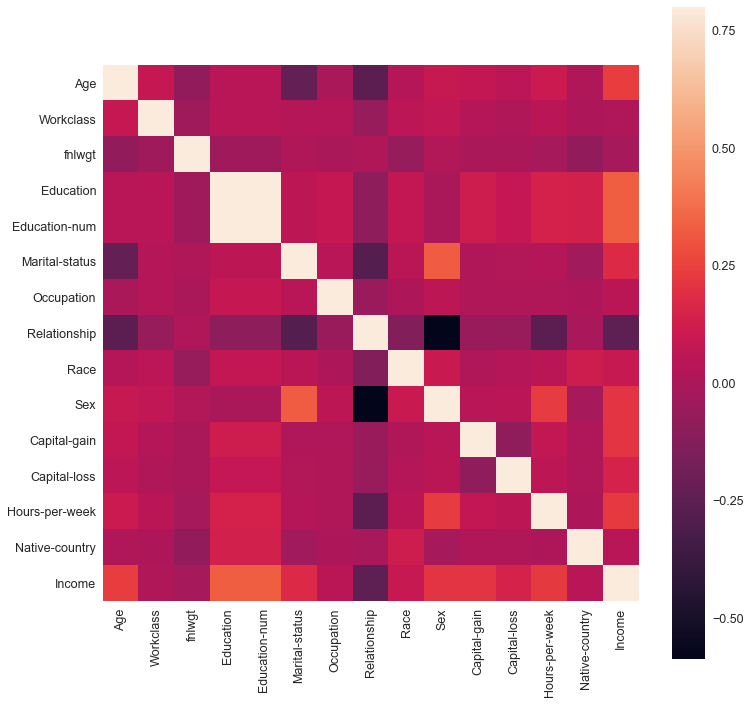

In [48]:
#correlation matrix
print(X.shape)
X = dataset[:train_objs_num]
X = pd.concat([X,dataset_train['Income']], axis = 1) 
X['Income'] = X['Income'].astype(int)

print(type(X['Age']), type(X['Age'][0]))
print(type(X['Education']), type(X['Education'][0]))
#print(X['Age'].corr(X['Education']))

corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);


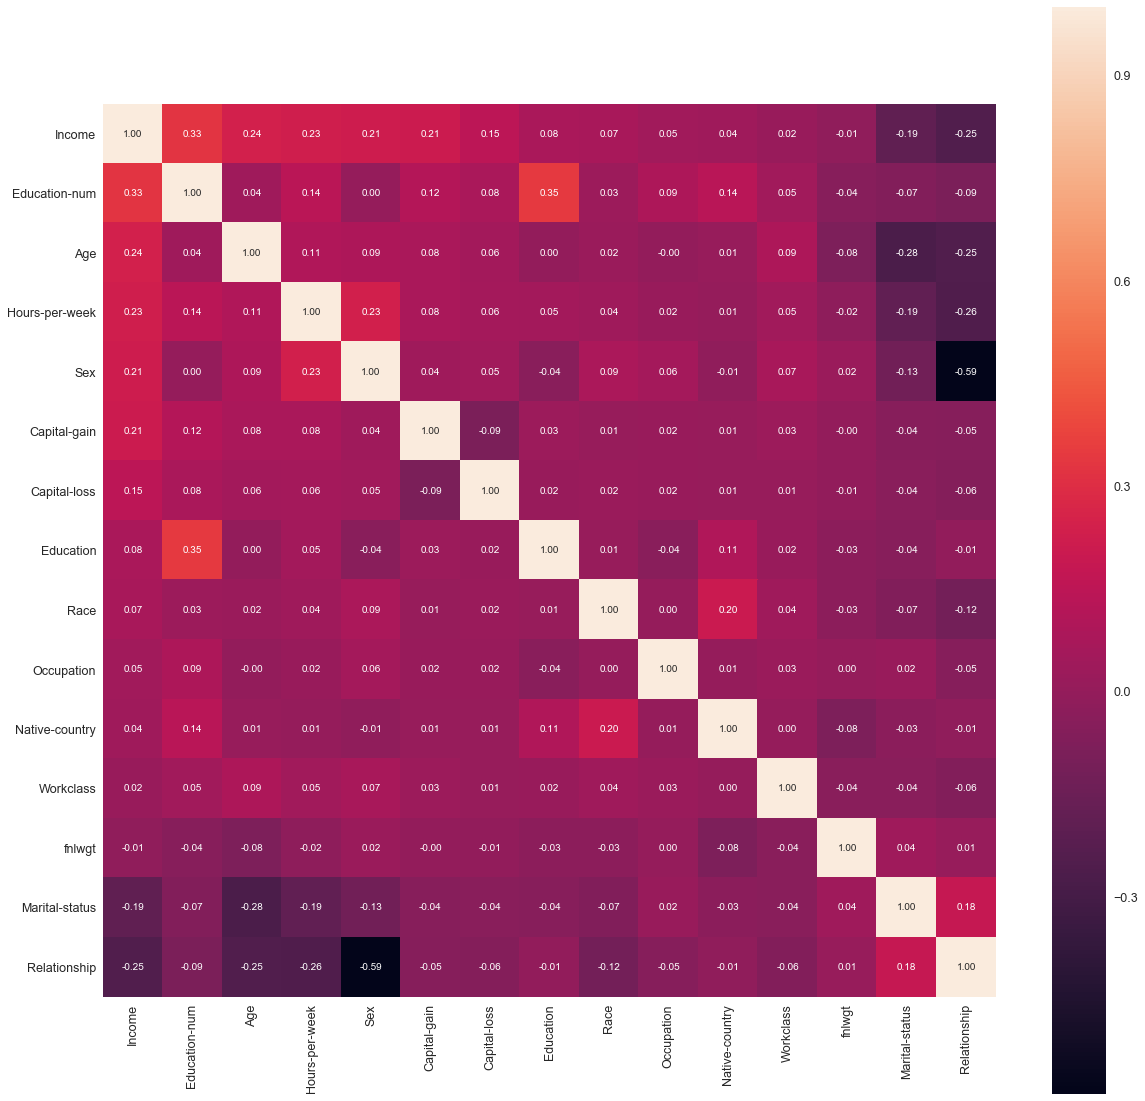

In [39]:
k = 15 #number of variables for heatmap
fig = plt.figure(figsize=(20,20))
cols = corrmat.nlargest(k, 'Income')['Income'].index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [52]:
#['Age','Workclass','fnlwgt','Education','Education-num','Marital-status','Occupation',' \
#                     Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
print(dataset.columns)
dataset_preprocess = dataset.copy()
dataset_preprocess = dataset_preprocess.drop('Education', axis = 1)
dataset_preprocess = dataset_preprocess.drop('fnlwgt', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Workclass', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Native-country', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Occupation', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Race', axis = 1)

###
#dataset_preprocess = dataset_preprocess.drop('Sex', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Capital-gain', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Relationship', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Age', axis = 1)
#dataset_preprocess = dataset_preprocess.drop('Hours-per-week', axis = 1)
print(dataset_preprocess.columns)
print(dataset_preprocess.shape)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country'],
      dtype='object')
Index(['Age', 'Workclass', 'Education-num', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
       'Hours-per-week', 'Native-country'],
      dtype='object')
(45222, 12)


## XGBOOST

In [53]:
from sklearn.grid_search import GridSearchCV
import warnings
import itertools
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
X = dataset_preprocess[:train_objs_num]
test_data = dataset_preprocess[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
'''
optimization_dict = {'max_depth': [4,5,6,7],
                     'n_estimators': [370],
                     'learning_rate':[0.1,0.8,0.12],
                     'subsample':[1.0,0.9],
                     'gamma':[0.2,0.3],
                     'colsample_bytree':[0.8]
                    }

xgb = XGBClassifier(tree_method = 'gpu_hist', predictor = 'gpu_predictor')
xgbc = GridSearchCV(xgb, optimization_dict, scoring='f1_micro', verbose=1, cv=3)
xgbc.fit(X_train, y_train)
print (xgbc.best_params_)

y_pred_max = xgbc.predict(X_test)
'''
n_set = [290, 370, 450]
depth = [4,5,6,7,8]
learn = [0.08,0.1,0.12]
gam = [0.2,0.3]
col = [0.7,0.8,1.0]
sub= [1.0,0.9]
f_s = 0
for n, d, l, g, c, s in itertools.product(n_set, depth, learn, gam, col, sub):
    xgbc = XGBClassifier(tree_method = 'gpu_hist', n_estimators=n, max_depth=d, learning_rate=l, cv=3, gamma=g, colsample_bytree=c, subsample=s)
    xgbc.fit(X_train, y_train)
    y_pred_max = xgbc.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_max, average='micro')
    if(fscore > f_s):
        f_s = fscore
        print (n, d, l ,g, c, s, "fscore = ", f_s)

print ("Misclassified sample %d" % (y_test!=y_pred_max).sum())
print ("Train Accuracy: ", accuracy_score(y_train, xgbc.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred_max))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_max, average='micro')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)


290 4 0.08 0.2 0.7 1.0 fscore =  0.8619709412507898
290 4 0.08 0.2 0.8 0.9 fscore =  0.8635502210991788


KeyboardInterrupt: 

In [54]:
X = dataset_preprocess[:train_objs_num]
test_data = dataset_preprocess[train_objs_num:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
xgbc = XGBClassifier(n_estimators=290, max_depth=4, learning_rate=0.1, cv=3, gamma=0.2, colsample_bytree=0.8, subsample=0.9)
xgbc.fit(X_train, y_train)
y_pred_max = xgbc.predict(X_test)

print ("Misclassified sample %d" % (y_test!=y_pred_max).sum())
print ("Train Accuracy: ", accuracy_score(y_train, xgbc.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred_max))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_max, average='micro')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)

test_std_pred = xgbc.predict(test_data)

with open('answer.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")

Misclassified sample 442
Train Accuracy:  0.8794931199101376
Test Accuracy:  0.8603916614024005
precision:  0.8603916614024005
recall:  0.8603916614024005
fscore:  0.8603916614024005
Done


## SVM

In [109]:
X = dataset_preprocess[:train_objs_num]
test_data = dataset_preprocess[train_objs_num:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#feature normalize
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, svm.predict(X_train_std)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)


test_std = sc.transform(test_data)
test_std_pred = svm.predict(test_std)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")

Misclassified sample 489
Train Accuracy:  0.8455841055883179
Test Accuracy:  0.8455464308275427
precision:  0.7670250896057348
recall:  0.5438373570520966
fscore:  0.6364312267657993
Done


## Random Forest Tree

In [141]:
X = dataset_preprocess[:train_objs_num]
test_data = dataset_preprocess[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''
max_fscore = 0
target_n_estimators = 0
for i in range(10, 100):
    forest = RandomForestClassifier(criterion='entropy', n_estimators=i)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    if fscore > max_fscore:
        max_fscore = fscore
        target_n_estimators = i
'''    
forest = RandomForestClassifier(criterion='entropy', n_estimators=20)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, forest.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)


test_std = sc.transform(test_data)
test_std_pred = forest.predict(test_std)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")

Misclassified sample 1159
Train Accuracy:  0.9650910239703037
Test Accuracy:  0.8169325540988785
precision:  0.6385083713850838
recall:  0.5508864084044649
fscore:  0.5914698625308424
Done


## Logistic Regression

In [186]:
X = dataset_preprocess[:train_objs_num]
test_data = dataset_preprocess[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
logreg = LogisticRegression(C=1.01, solver='lbfgs', multi_class='multinomial', penalty = 'l2')
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, logreg.predict(X_train_std)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)

test_std = sc.transform(test_data)
test_std_pred = logreg.predict(test_std)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")


Misclassified sample 494
Train Accuracy:  0.835790508284
Test Accuracy:  0.843967150979
precision:  0.843967150979
recall:  0.843967150979
fscore:  0.843967150979
Done


## Bagging

In [217]:
X = dataset_preprocess[:train_objs_num]
test_data = dataset_preprocess[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

bag = BaggingClassifier(n_estimators = 20)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

#scores = cross_val_score(xgbc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)

print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, bag.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)


test_std_pred = bag.predict(test_data)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")

Misclassified sample 1044
Train Accuracy:  0.91699245745
Test Accuracy:  0.835097141052
precision:  0.835097141052
recall:  0.835097141052
fscore:  0.835097141052
Done


## MLP

In [126]:
X = dataset_preprocess.iloc[:train_objs_num]
test_data = dataset_preprocess.iloc[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(300, 300), max_iter=100, alpha=1e-5,
                    solver='sgd', verbose=1, tol=1e-4, random_state=1,
                    learning_rate_init=0.1)

clf.fit(X_train_std, y_train) 

y_pred = clf.predict(X_test_std)

#scores = cross_val_score(xgbc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)

print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train_std)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)

test_std = sc.transform(test_data)
test_std_pred = clf.predict(test_std)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")


Iteration 1, loss = 0.35413304
Iteration 2, loss = 0.33352653
Iteration 3, loss = 0.33005566
Iteration 4, loss = 0.32766388
Iteration 5, loss = 0.32574088
Iteration 6, loss = 0.32561221
Iteration 7, loss = 0.32461103
Iteration 8, loss = 0.32363942
Iteration 9, loss = 0.32324015
Iteration 10, loss = 0.32148175
Iteration 11, loss = 0.32122388
Iteration 12, loss = 0.32012336
Iteration 13, loss = 0.31957273
Iteration 14, loss = 0.31800463
Iteration 15, loss = 0.31721481
Iteration 16, loss = 0.31737785
Iteration 17, loss = 0.31633858
Iteration 18, loss = 0.31621242
Iteration 19, loss = 0.31466884
Iteration 20, loss = 0.31408451
Iteration 21, loss = 0.31342334
Iteration 22, loss = 0.31263172
Iteration 23, loss = 0.31155485
Iteration 24, loss = 0.31182342
Iteration 25, loss = 0.31022013
Iteration 26, loss = 0.30968049
Iteration 27, loss = 0.31019001
Iteration 28, loss = 0.30798667
Iteration 29, loss = 0.30785139
Iteration 30, loss = 0.30653673
Iteration 31, loss = 0.30627079
Iteration 32, los

## Gradient Boost

In [166]:
X = dataset_preprocess.iloc[:train_objs_num]
test_data = dataset_preprocess.iloc[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


gbc = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.1, max_depth = 25, random_state = 0)

gbc.fit(X_train, y_train) 

y_pred = gbc.predict(X_test)

#scores = cross_val_score(xgbc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)

print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, gbc.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)


test_std_pred = gbc.predict(test_data)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")


Misclassified sample 539
Train Accuracy:  0.9503650659926987
Test Accuracy:  0.8297536323436513
precision:  0.6776504297994269
recall:  0.6010165184243964
fscore:  0.6370370370370371
Done


## Label propagation

In [85]:
from sklearn.semi_supervised import label_propagation, LabelPropagation

X = dataset_preprocess.iloc[:train_objs_num]
test_data = dataset_preprocess.iloc[train_objs_num:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


label_spread = label_propagation.LabelSpreading()

label_spread.fit(X_train_std, y_train) 

y_pred = label_spread.predict(X_test_std)

#scores = cross_val_score(xgbc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)

print ("Misclassified sample %d" % (y_test!=y_pred).sum())
print ("Train Accuracy: ", accuracy_score(y_train, label_spread.predict(X_train_std)))
print ("Test Accuracy: ", accuracy_score(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print ("precision: ", precision)
print ("recall: ", recall)
print ("fscore: ", fscore)

test_std = sc.transform(test_data)
test_std_pred = label_spread.predict(test_std)

with open('output.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'ans'])
    for i in range(len(test_std_pred)):
        writer.writerow([i, test_std_pred[i]])

print ("Done")

MemoryError: 